In [66]:
# Task 1 week 2
import re
import numpy as np
from scipy.spatial import distance
fl = open('sentences.txt', 'r')
data_list = fl.readlines()
words = dict()
for line in data_list:
    line = filter(None, re.split('[^a-z]', line.lower()))
    print line
    for word in line:
        words[word] = len(words);
mtx = np.zeros((len(data_list), len(words)))      
for i, line in enumerate(data_list, start = 0):
    line = filter(None, re.split('[^a-z]', line.lower()))
    for j, word in enumerate(line, start = 0):
        mtx[i, words[word]] += 1
dist_from_1st = dict()
for i in range(1, len(data_list)):
    dist_from_1st[i] = distance.cosine(mtx[0, :], mtx[i, :])
for w in sorted(dist_from_1st, key=dist_from_1st.get):
    print w, dist_from_1st[w]


['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']
['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes']
['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output']
['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals']
['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']
['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 't

# Task 2 week 2

In [65]:

import numpy as np
import scipy
from scipy.linalg import solve
from matplotlib import pylab as plt

In [59]:
def f(x):
    return np.sin(x/5.)*np.exp(x/10.) + 5*np.exp(-x/2.)

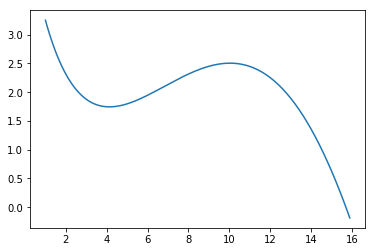

In [60]:
%matplotlib inline
x = np.arange(1.,16., 0.1)
plt.plot(x, f(x))
plt.show()

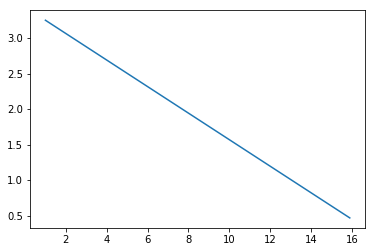

In [61]:
A1 = np.array([[1,1], [1,15]])
b1 = np.array([f(1), f(15)])
w1 = solve(A1, b1)
plt.plot(x, w1[0] + w1[1]*x)

[ 3.25221687  2.31617016  0.63522142]
[ 3.32512949 -0.06531159 -0.00760104]


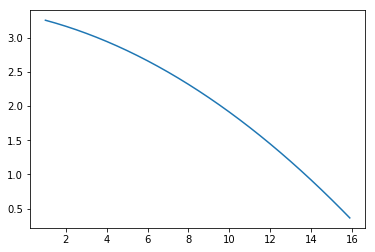

In [62]:
A2 = np.array([[1,1,1], [1,8,8**2], [1, 15, 15**2]])
b2 = np.array([f(1), f(8), f(15)])
print b2
w2 = solve(A2, b2)
print w2
plt.plot(x, w2[0] + w2[1]*x + w2[2]*x**2)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


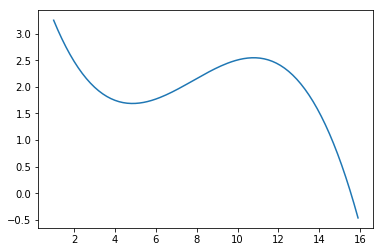

In [63]:
A3 = np.array([[1,1,1,1], [1,4,4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
b3 = np.array([f(1), f(4), f(10), f(15)])
w3 = scipy.linalg.solve(A3, b3)
print w3
plt.plot(x, w3[0] + w3[1]*x + w3[2]*x**2 + w3[3]*x**3)

# Task 1 week 3

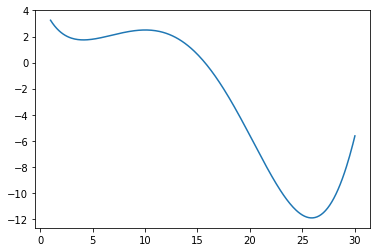

      fun: 1.7452682903447336
 hess_inv: array([[ 5.98752645]])
      jac: array([ -2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627628])
      fun: -11.898894665981313
 hess_inv: array([[ 1.67936744]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.88019321])


In [81]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
x = np.arange(1., 30.1, 0.1)
plt.plot(x, f(x))
plt.show()
minval = minimize(f, 2, method='BFGS')
print minval
minval2 = minimize(f, 30, method='BFGS')
print minval2

# Task 2 week 3

In [101]:
minval3 = differential_evolution(f, [(1, 30)])
print minval3

     fun: array([-11.89889467])
     jac: array([ -1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 83L
     nit: 4
 success: True
       x: array([ 25.88019322])


# Task 3 week 3

In [111]:
def h(x):
    return np.int(np.sin(x/5.)*np.exp(x/10.) + 5*np.exp(-x/2.))

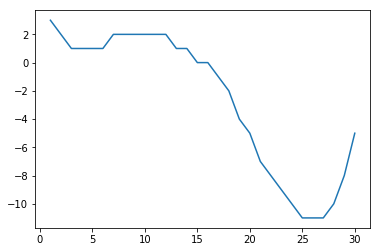

In [117]:
h2 = np.vectorize(h)
plt.plot(x, h2(x))
plt.show()

In [129]:
minval4 = minimize(h2, 30, method='BFGS')
print minval4

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])


In [121]:
minval5 = differential_evolution(h2, [(1, 30)])
print minval5

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77L
     nit: 4
 success: True
       x: array([ 25.14773507])
